# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import scipy.stats as stats
import scikit_posthocs as sp

import utils # offload data processing into .py file

In [2]:
# data_dir = 'C:/Users/Emily Jensen/OneDrive - UCB-O365/Drone Feedback Data/data/'

data_dir = '/Users/emilyjensen/Library/CloudStorage/OneDrive-UCB-O365/Drone Feedback Data/data/'

Open all of the relevant data files/directories

Emily downloaded the final data and Qualtrics surveys on 4/16/24

Qualtrics export settings:

<img src="qualtrics_export_settings.png" alt="Qualtrics Export Settings" width="500px">

# Load Data

Notes on participants that seem to have restarted the experiment:
- `5bd49bcc25db7b0001794063` restarted after trial 1 - KEEP
- `5c90094e71f3100016181ea9` restarted after trial 3 and again after trial 1 - KEEP
- `5ef9f528c7ae587afa25fe9b` restarted after trial 6 - REMOVE
- `60fcc292d13ae9614d4a77a7` restarted after trial 3 - KEEP
- `6105c41aa4fe602501d5a8cc` restarted after trial 8 - REMOVE
- `610796f1301fccdca446af57` restarted after trial 7 - REMOVE
- `629658baad2881aba974c6c3` restarted after trial 2 - KEEP
- `63026a8fd8429b224cd2a134` restarted before completing trial 1 - KEEP
- `631f1b608af38f654d2a3b1f` restarted after trial 15 - REMOVE
- `637d4196c70a66e28ecede34` restarted before completing trial 1 - KEEP
- `6388b6c86e47b08e1eded1fd` restarted before completing trial 1 - KEEP
- `63ba10de73415d047e1d6731` restarted after trial 5 and again after trial 1 - REMOVE
- `643c6175d46d41e74033994f` restarted after trial 8 and again after trial 1 - REMOVE
- `652ab7948cb59f4c50c7972a` restarted after trial 1 - KEEP
- `6596a5cad60ef105b6c18897` restarted after trial 1 - KEEP
- `65cba99c92b362b45e414da7` restarted after trial 17 - REMOVE

We will keep the participants who complete less than 5 trials before completing a complete run.

Participant `6400dc9f84ed19aeedc1a2cc` seems to have filled out the qualtrics survey twice. The numerical data are the same and the free response questions have very similar content so I feel fine only keeping the first entry.

This has been implemented in `utils.load_data()`

Participants removed for not providing a good-faith effort:

- `63026a8fd8429b224cd2a134` 
- `637d4196c70a66e28ecede34` 
- `5f90581950d8520e8c7d3890`

These participants crashed on every trial and never used horizontal inputs

In [3]:
part_file, trial_file, ids = utils.load_data()

Dropped 17 duplicate IDs:
['5bd49bcc25db7b0001794063' '5c90094e71f3100016181ea9'
 '5ef9f528c7ae587afa25fe9b' '60fcc292d13ae9614d4a77a7'
 '6105c41aa4fe602501d5a8cc' '610796f1301fccdca446af57'
 '629658baad2881aba974c6c3' '63026a8fd8429b224cd2a134'
 '631f1b608af38f654d2a3b1f' '637d4196c70a66e28ecede34'
 '6388b6c86e47b08e1eded1fd' '63ba10de73415d047e1d6731'
 '6400dc9f84ed19aeedc1a2cc' '643c6175d46d41e74033994f'
 '652ab7948cb59f4c50c7972a' '6596a5cad60ef105b6c18897'
 '65cba99c92b362b45e414da7']
Final number of IDs in participant file: 137
Final number of IDs in trial file: 137


# Basic stats

This is after filtering out participants that restarted the experiment

In [4]:
utils.run_basic_stats(part_file)

           count  proportion
condition                   
full          46        0.34
score         45        0.33
text          46        0.34
            count  proportion
gender                       
Man            59        0.43
Non-binary      7        0.05
Woman          71        0.52
                  count  proportion
drone_experience                   
None                112        0.82
Some                 20        0.15
Regularly             5        0.04
Professional          0        0.00
                       count  proportion
video_game_experience                   
None                      24        0.18
Monthly                   38        0.28
Weekly                    35        0.26
Daily                     40        0.29
                   count  proportion
feedback_helped                     
Strongly Disagree     22        0.16
Disagree              17        0.12
Neutral               22        0.16
Agree                 59        0.43
Strongly Agree       

In [4]:
trial_file['trial_time_seconds'].describe()

count    2684.000000
mean       27.647862
std        19.691424
min        -0.000072
25%        16.485780
50%        24.353495
75%        36.039500
max       121.217149
Name: trial_time_seconds, dtype: float64

<Axes: >

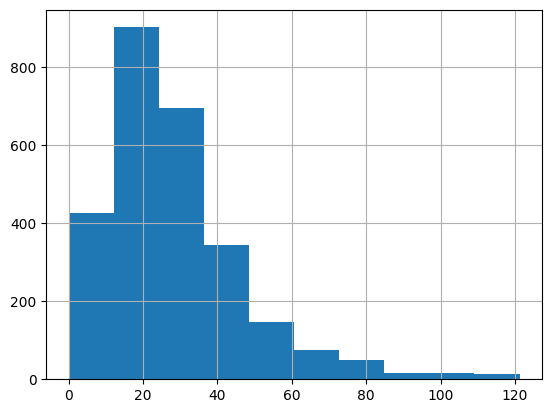

In [5]:
trial_file.loc[(trial_file['trial_time_seconds'] < 200), 'trial_time_seconds'].hist()

In [ ]:
# select participants with 'Regularly' and 'Professional' drone experience
part_file[part_file['drone_experience'].isin(['Regularly', 'Professional'])]['n_safe_landings']

# Research Themes

## Perception of Feedback

### What is associated with overall feedback helpfulness rating?

In [71]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings'] + [f'mode_{q}_code' for q in ['motivation', 'manageable', 'actionable', 'timely', 'reflection']]

dep_var = 'feedback_helped'
utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.134396
         Iterations: 64
         Function evaluations: 70
         Gradient evaluations: 70
                             OrderedModel Results                             
Dep. Variable:        feedback_helped   Log-Likelihood:                -155.41
Model:                   OrderedModel   AIC:                             348.8
Method:            Maximum Likelihood   BIC:                             404.3
Date:                Sun, 05 May 2024                                         
Time:                        17:00:04                                         
No. Observations:                 137                                         
Df Residuals:                     118                                         
Df Model:                          15                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [72]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings'] + [f'mode_{q}_code' for q in ['motivation_collapsed', 'manageable_collapsed', 'actionable_collapsed', 'timely_collapsed', 'reflection_collapsed']]

dep_var = 'feedback_helped_collapsed'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.698544
         Iterations: 71
         Function evaluations: 77
         Gradient evaluations: 77
                                 OrderedModel Results                                
Dep. Variable:     feedback_helped_collapsed   Log-Likelihood:                -95.701
Model:                          OrderedModel   AIC:                             225.4
Method:                   Maximum Likelihood   BIC:                             275.0
Date:                       Sun, 05 May 2024                                         
Time:                               17:01:13                                         
No. Observations:                        137                                         
Df Residuals:                            120                                         
Df Model:                                 15                                         
                                     coef    std err  

### What is associated with overall rating for each dimension?

In [73]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_motivation_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.360847
         Iterations: 48
         Function evaluations: 57
         Gradient evaluations: 57
                              OrderedModel Results                              
Dep. Variable:     mode_motivation_code   Log-Likelihood:                -186.44
Model:                     OrderedModel   AIC:                             400.9
Method:              Maximum Likelihood   BIC:                             441.8
Date:                  Sun, 05 May 2024                                         
Time:                          17:03:37                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [74]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_motivation_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.901031
         Iterations: 45
         Function evaluations: 53
         Gradient evaluations: 53
                                   OrderedModel Results                                   
Dep. Variable:     mode_motivation_collapsed_code   Log-Likelihood:                -123.44
Model:                               OrderedModel   AIC:                             270.9
Method:                        Maximum Likelihood   BIC:                             305.9
Date:                            Sun, 05 May 2024                                         
Time:                                    17:04:14                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

In [75]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_manageable_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.159203
         Iterations: 44
         Function evaluations: 51
         Gradient evaluations: 51
                              OrderedModel Results                              
Dep. Variable:     mode_manageable_code   Log-Likelihood:                -158.81
Model:                     OrderedModel   AIC:                             345.6
Method:              Maximum Likelihood   BIC:                             386.5
Date:                  Sun, 05 May 2024                                         
Time:                          17:04:38                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [76]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_manageable_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.948572
         Iterations: 40
         Function evaluations: 46
         Gradient evaluations: 46
                                   OrderedModel Results                                   
Dep. Variable:     mode_manageable_collapsed_code   Log-Likelihood:                -129.95
Model:                               OrderedModel   AIC:                             283.9
Method:                        Maximum Likelihood   BIC:                             318.9
Date:                            Sun, 05 May 2024                                         
Time:                                    17:05:17                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

In [77]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_timely_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.928322
         Iterations: 54
         Function evaluations: 62
         Gradient evaluations: 62
                             OrderedModel Results                             
Dep. Variable:       mode_timely_code   Log-Likelihood:                -127.18
Model:                   OrderedModel   AIC:                             282.4
Method:            Maximum Likelihood   BIC:                             323.2
Date:                Sun, 05 May 2024                                         
Time:                        17:05:29                                         
No. Observations:                 137                                         
Df Residuals:                     123                                         
Df Model:                          10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [78]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_timely_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.728298
         Iterations: 44
         Function evaluations: 50
         Gradient evaluations: 50
                                 OrderedModel Results                                 
Dep. Variable:     mode_timely_collapsed_code   Log-Likelihood:                -99.777
Model:                           OrderedModel   AIC:                             223.6
Method:                    Maximum Likelihood   BIC:                             258.6
Date:                        Sun, 05 May 2024                                         
Time:                                17:06:11                                         
No. Observations:                         137                                         
Df Residuals:                             125                                         
Df Model:                                  10                                         
                                 coef    std 

In [79]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_reflection_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.278474
         Iterations: 47
         Function evaluations: 56
         Gradient evaluations: 56
                              OrderedModel Results                              
Dep. Variable:     mode_reflection_code   Log-Likelihood:                -175.15
Model:                     OrderedModel   AIC:                             378.3
Method:              Maximum Likelihood   BIC:                             419.2
Date:                  Sun, 05 May 2024                                         
Time:                          17:06:33                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [80]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_reflection_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.773863
         Iterations: 47
         Function evaluations: 56
         Gradient evaluations: 56
                                   OrderedModel Results                                   
Dep. Variable:     mode_reflection_collapsed_code   Log-Likelihood:                -106.02
Model:                               OrderedModel   AIC:                             236.0
Method:                        Maximum Likelihood   BIC:                             271.1
Date:                            Sun, 05 May 2024                                         
Time:                                    17:07:10                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

In [81]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_actionable_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.442709
         Iterations: 44
         Function evaluations: 52
         Gradient evaluations: 52
                              OrderedModel Results                              
Dep. Variable:     mode_actionable_code   Log-Likelihood:                -197.65
Model:                     OrderedModel   AIC:                             423.3
Method:              Maximum Likelihood   BIC:                             464.2
Date:                  Sun, 05 May 2024                                         
Time:                          17:08:15                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [82]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_actionable_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.964529
         Iterations: 40
         Function evaluations: 48
         Gradient evaluations: 48
                                   OrderedModel Results                                   
Dep. Variable:     mode_actionable_collapsed_code   Log-Likelihood:                -132.14
Model:                               OrderedModel   AIC:                             288.3
Method:                        Maximum Likelihood   BIC:                             323.3
Date:                            Sun, 05 May 2024                                         
Time:                                    17:08:25                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

### What is associated with trial rating for each dimension?

In [83]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'motivation'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.456427
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:             motivation   Log-Likelihood:                -3909.0
Model:                   OrderedModel   AIC:                             7836.
Method:            Maximum Likelihood   BIC:                             7889.
Date:                Sun, 05 May 2024                                         
Time:                        17:09:41                                         
No. Observations:                2684                                         
Df Residuals:                    2675                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [84]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'motivation_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.970079
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
                              OrderedModel Results                              
Dep. Variable:     motivation_collapsed   Log-Likelihood:                -2603.7
Model:                     OrderedModel   AIC:                             5221.
Method:              Maximum Likelihood   BIC:                             5263.
Date:                  Sun, 05 May 2024                                         
Time:                          17:11:14                                         
No. Observations:                  2684                                         
Df Residuals:                      2677                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [85]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'manageable'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.276166
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
                             OrderedModel Results                             
Dep. Variable:             manageable   Log-Likelihood:                -3425.2
Model:                   OrderedModel   AIC:                             6868.
Method:            Maximum Likelihood   BIC:                             6922.
Date:                Sun, 05 May 2024                                         
Time:                        17:11:55                                         
No. Observations:                2684                                         
Df Residuals:                    2675                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [86]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'manageable_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.991112
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
                              OrderedModel Results                              
Dep. Variable:     manageable_collapsed   Log-Likelihood:                -2660.1
Model:                     OrderedModel   AIC:                             5334.
Method:              Maximum Likelihood   BIC:                             5376.
Date:                  Sun, 05 May 2024                                         
Time:                          17:12:18                                         
No. Observations:                  2684                                         
Df Residuals:                      2677                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [87]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'timely'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.032238
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
                             OrderedModel Results                             
Dep. Variable:                 timely   Log-Likelihood:                -2770.5
Model:                   OrderedModel   AIC:                             5559.
Method:            Maximum Likelihood   BIC:                             5612.
Date:                Sun, 05 May 2024                                         
Time:                        17:12:42                                         
No. Observations:                2684                                         
Df Residuals:                    2675                                         
Df Model:                           5                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------

In [88]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'timely_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.798633
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
                             OrderedModel Results                             
Dep. Variable:       timely_collapsed   Log-Likelihood:                -2143.5
Model:                   OrderedModel   AIC:                             4301.
Method:            Maximum Likelihood   BIC:                             4342.
Date:                Sun, 05 May 2024                                         
Time:                        17:13:55                                         
No. Observations:                2684                                         
Df Residuals:                    2677                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [89]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'reflection'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.448528
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
                             OrderedModel Results                             
Dep. Variable:             reflection   Log-Likelihood:                -3887.8
Model:                   OrderedModel   AIC:                             7794.
Method:            Maximum Likelihood   BIC:                             7847.
Date:                Sun, 05 May 2024                                         
Time:                        17:14:57                                         
No. Observations:                2684                                         
Df Residuals:                    2675                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [90]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'reflection_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.931027
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
                              OrderedModel Results                              
Dep. Variable:     reflection_collapsed   Log-Likelihood:                -2498.9
Model:                     OrderedModel   AIC:                             5012.
Method:              Maximum Likelihood   BIC:                             5053.
Date:                  Sun, 05 May 2024                                         
Time:                          17:16:09                                         
No. Observations:                  2684                                         
Df Residuals:                      2677                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [91]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'actionable'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.498906
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:             actionable   Log-Likelihood:                -4023.1
Model:                   OrderedModel   AIC:                             8064.
Method:            Maximum Likelihood   BIC:                             8117.
Date:                Sun, 05 May 2024                                         
Time:                        17:17:02                                         
No. Observations:                2684                                         
Df Residuals:                    2675                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [92]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'actionable_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.016162
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26
                              OrderedModel Results                              
Dep. Variable:     actionable_collapsed   Log-Likelihood:                -2727.4
Model:                     OrderedModel   AIC:                             5469.
Method:              Maximum Likelihood   BIC:                             5510.
Date:                  Sun, 05 May 2024                                         
Time:                          17:17:41                                         
No. Observations:                  2684                                         
Df Residuals:                      2677                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

### Distributions of dimensional ratings across groups

**MOTIVATION**

In [93]:
utils.run_kruskal('mode_motivation_code', part_file)

mode_motivation_code     0     1     2     3     4
condition                                         
full                  0.04  0.09  0.28  0.41  0.17
score                 0.02  0.13  0.31  0.33  0.20
text                  0.13  0.04  0.17  0.43  0.22
KruskalResult(statistic=0.31567586876934506, pvalue=0.8539881728726944)


In [94]:
utils.run_kruskal('mode_motivation_collapsed_code', part_file)

mode_motivation_collapsed_code     0     1     2
condition                                       
full                            0.17  0.24  0.59
score                           0.16  0.29  0.56
text                            0.17  0.17  0.65
KruskalResult(statistic=0.5094110183965355, pvalue=0.7751447373473915)


**MANAGEABLE**

In [95]:
utils.run_kruskal('mode_manageable_code', part_file)

mode_manageable_code     0     1     2     3     4
condition                                         
full                  0.02  0.09  0.63  0.15  0.11
score                 0.07  0.22  0.60  0.04  0.07
text                  0.07  0.04  0.59  0.20  0.11
KruskalResult(statistic=8.5469918210492, pvalue=0.01393298942940031)
           full     score      text
full   1.000000  0.047528  1.000000
score  0.047528  1.000000  0.024559
text   1.000000  0.024559  1.000000


In [96]:
utils.run_kruskal('mode_manageable_collapsed_code', part_file)

mode_manageable_collapsed_code     0     1     2
condition                                       
full                            0.11  0.59  0.30
score                           0.31  0.60  0.09
text                            0.11  0.54  0.35
KruskalResult(statistic=13.936061267415916, pvalue=0.000941505249968438)
          full    score     text
full   1.00000  0.00665  1.00000
score  0.00665  1.00000  0.00208
text   1.00000  0.00208  1.00000


**ACTIONABLE**

In [97]:
utils.run_kruskal('mode_actionable_code', part_file)

mode_actionable_code     0     1     2     3     4
condition                                         
full                  0.02  0.09  0.24  0.52  0.13
score                 0.16  0.27  0.29  0.16  0.13
text                  0.07  0.09  0.13  0.50  0.22
KruskalResult(statistic=15.707944502215605, pvalue=0.0003882068464027618)
           full     score      text
full   1.000000  0.005095  1.000000
score  0.005095  1.000000  0.000714
text   1.000000  0.000714  1.000000


In [98]:
utils.run_kruskal('mode_actionable_collapsed_code', part_file)

mode_actionable_collapsed_code     0     1     2
condition                                       
full                            0.13  0.22  0.65
score                           0.40  0.29  0.31
text                            0.17  0.13  0.70
KruskalResult(statistic=16.83896372223278, pvalue=0.0002205288878245364)
           full     score      text
full   1.000000  0.001425  1.000000
score  0.001425  1.000000  0.000875
text   1.000000  0.000875  1.000000


**TIMELY**

In [99]:
utils.run_kruskal('mode_timely_code', part_file)

mode_timely_code     0     1     2     3     4
condition                                     
full              0.00  0.00  0.74  0.13  0.13
score             0.02  0.07  0.64  0.18  0.09
text              0.02  0.00  0.61  0.17  0.20
KruskalResult(statistic=2.5897813753657135, pvalue=0.2739278063781436)


In [100]:
utils.run_kruskal('mode_timely_collapsed_code', part_file)

mode_timely_collapsed_code     0     1     2
condition                                   
full                        0.02  0.72  0.26
score                       0.09  0.64  0.27
text                        0.02  0.59  0.39
KruskalResult(statistic=2.9089328827839984, pvalue=0.23352492990309748)


**REFLECTION**

In [101]:
utils.run_kruskal('mode_reflection_code', part_file)

mode_reflection_code     0     1     2     3     4
condition                                         
full                  0.04  0.04  0.22  0.46  0.24
score                 0.09  0.11  0.18  0.40  0.22
text                  0.07  0.07  0.22  0.43  0.22
KruskalResult(statistic=0.6951396880264286, pvalue=0.7064026742088294)


In [102]:
utils.run_kruskal('mode_reflection_collapsed_code', part_file)

mode_reflection_collapsed_code     0     1     2
condition                                       
full                            0.13  0.20  0.67
score                           0.22  0.16  0.62
text                            0.13  0.20  0.67
KruskalResult(statistic=0.7144449998691459, pvalue=0.6996168157199105)


### Did they think the feedback helped?

In [104]:
utils.run_kruskal('feedback_helped_code', part_file)

feedback_helped_code     0     1     2     3     4
condition                                         
full                  0.09  0.13  0.22  0.43  0.13
score                 0.22  0.16  0.20  0.31  0.11
text                  0.17  0.09  0.07  0.54  0.13
KruskalResult(statistic=3.7471395176659312, pvalue=0.15357445835716177)


In [105]:
utils.run_kruskal('feedback_helped_collapsed_code', part_file)

feedback_helped_collapsed_code     0     1     2
condition                                       
full                            0.22  0.22  0.57
score                           0.38  0.20  0.42
text                            0.26  0.07  0.67
KruskalResult(statistic=4.9103711719278245, pvalue=0.08584726191584136)


## Evolution of Performance

For each condition, plot out the success of the trial for each participant

skipping participant 6522a86994a5ce0d7bb9feba trial 9


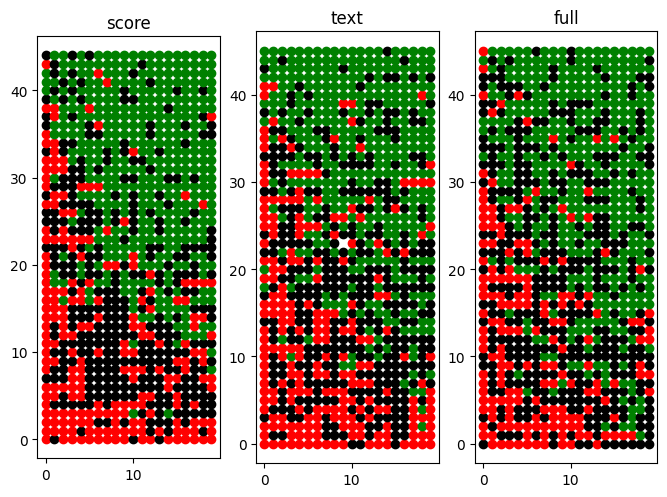

In [6]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    overall_scores = []

    # for each participant in that condition
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # score for that participant
        data['outcome_sore'] = 0
        data.loc[data['outcome'] == 'Unsafe', 'outcome_score'] = 3
        data.loc[data['outcome'] == 'Crash', 'outcome_score'] = 5

        total_score = data['outcome_score'].sum()
        overall_scores.append((i, part, total_score))

    # sort participants for this condition
    sorted_participants = sorted(overall_scores, key=lambda x: x[2], reverse=True)

    # plot all participants in sorted order
    for sorted_index, (_, part, _) in enumerate(sorted_participants):
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # plot all trials for that participant
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome == 'Safe':
                    axs[a].plot(trial, sorted_index, 'go')
                elif outcome == 'Unsafe':
                    axs[a].plot(trial, sorted_index, 'ko')
                else:
                    axs[a].plot(trial, sorted_index, 'ro')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

skipping participant 6522a86994a5ce0d7bb9feba trial 9


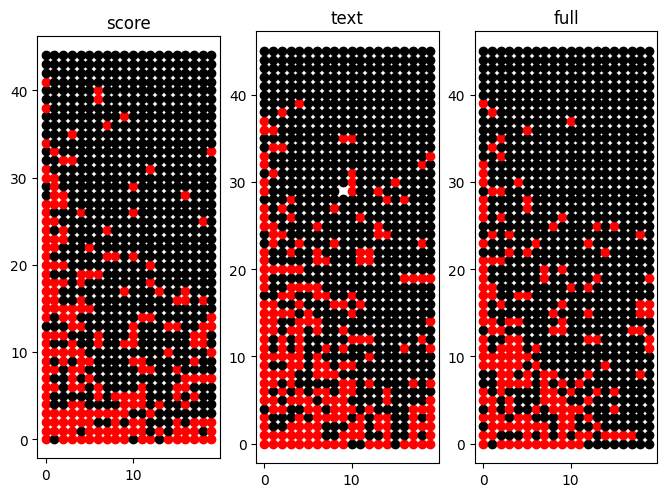

In [7]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    overall_scores = []

    # for each participant in that condition
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # score for that participant
        data['outcome_sore'] = 0
        data.loc[data['outcome'] == 'Crash', 'outcome_score'] = 3

        total_score = data['outcome_score'].sum()
        overall_scores.append((i, part, total_score))

    # sort participants for this condition
    sorted_participants = sorted(overall_scores, key=lambda x: x[2], reverse=True)

    # plot all participants in sorted order
    for sorted_index, (_, part, _) in enumerate(sorted_participants):
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # plot all trials for that participant
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome == 'Safe' or outcome == 'Unsafe':
                    axs[a].plot(trial, sorted_index, 'ko')
                else:
                    axs[a].plot(trial, sorted_index, 'ro')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

In [32]:
# calculate if each participant got a safe landing within the first 5 trials
part_file['safe_in_first_5'] = False
part_file['land_in_first_5'] = False
part_file['safe_last_5'] = 0
part_file['unsafe_last_5'] = 0
part_file['land_last_5'] = 0
part_file['crash_last_5'] = 0

for part in part_file['prolific_id']:
    data = pd.read_csv(data_dir + part + '/survey_responses.csv')
    first_five = data[data['trial'] <= 5]
    last_five = data[data['trial'] >= 16]

    n_safe = (first_five['outcome'] == 'Safe').sum()
    if n_safe > 0:
        part_file.loc[part_file['prolific_id'] == part, 'safe_in_first_5'] = True
    n_land = (first_five['outcome'].isin(['Safe', 'Unsafe'])).sum()
    if n_land > 0:
        part_file.loc[part_file['prolific_id'] == part, 'land_in_first_5'] = True

    n_safe = (last_five['outcome'] == 'Safe').sum()
    n_unsafe = (last_five['outcome'] == 'Unsafe').sum()
    n_crash = (last_five['outcome'] == 'Crash').sum()
    n_land = n_safe + n_unsafe
    part_file.loc[part_file['prolific_id'] == part, 'safe_last_5'] = n_safe
    part_file.loc[part_file['prolific_id'] == part, 'unsafe_last_5'] = n_unsafe
    part_file.loc[part_file['prolific_id'] == part, 'land_last_5'] = n_land
    part_file.loc[part_file['prolific_id'] == part, 'crash_last_5'] = n_crash

In [33]:
struggle_land_ids = part_file[part_file['land_in_first_5'] == False]['prolific_id']
struggle_safe_ids = part_file[part_file['safe_in_first_5'] == False]['prolific_id']

In [35]:
part_file.groupby('condition')['safe_in_first_5'].value_counts().unstack()

safe_in_first_5,False,True
condition,,
full,23,23
score,23,22
text,23,23


In [36]:
part_file[part_file['prolific_id'].isin(struggle_land_ids)].groupby('condition')['safe_last_5'].agg(['mean', 'std'])

,mean,std
condition,,
full,3.0,1.414214
score,1.0,2.000000
text,1.5,1.732051


In [28]:
part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['n_crashes'].agg(['mean', 'std'])

,mean,std
condition,,
full,5.869565,2.768399
score,7.000000,3.977208
text,7.391304,3.499859


In [37]:
utils.run_anova('safe_last_5', part_file[part_file['prolific_id'].isin(struggle_land_ids)])

F_onewayResult(statistic=0.8217391304347825, pvalue=0.478005876643478)


In [16]:
part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['n_safe_landings'].agg(['mean', 'std'])

,mean,std
condition,,
full,5.000000,3.089572
score,4.173913,4.725676
text,4.521739,4.021189


In [14]:
utils.run_anova('n_safe_landings', part_file[part_file['prolific_id'].isin(struggle_land_ids)])

F_onewayResult(statistic=0.05749674054758801, pvalue=0.9445661268627443)


In [13]:
part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['n_safe_landings'].mean()

condition
full     5.000000
score    4.173913
text     4.521739
Name: n_safe_landings, dtype: float64

In [8]:
part_file['n_landings'] = part_file['n_safe_landings'] + part_file['n_unsafe_landings']
part_file['any_landings'] = part_file['n_landings'] > 0

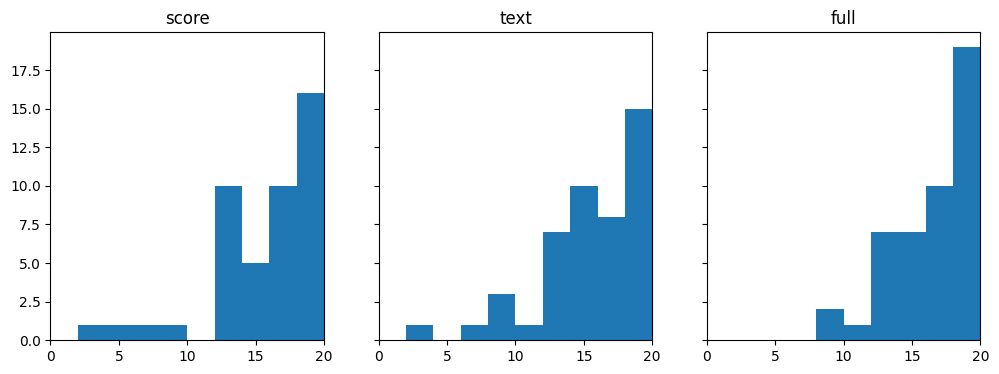

In [9]:
fig, axs = plt.subplots(1,3, figsize=(12,4), sharey=True)

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    data = part_file[part_file['condition'] == conditions[a]]['n_landings']
    axs[a].hist(data,bins=10,range=(0,20))
    axs[a].set_title(f'{conditions[a]}')
    axs[a].set_xlim(0,20)

plt.show()

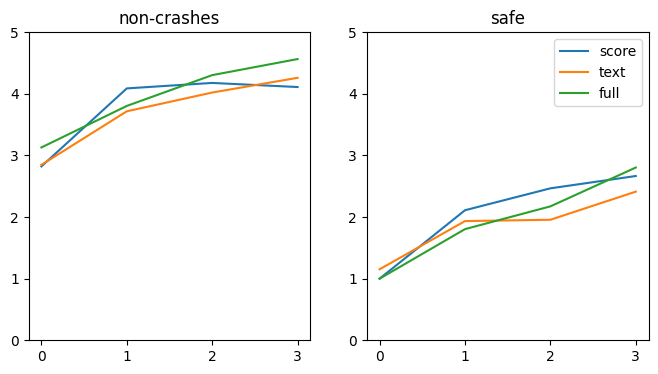

In [10]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

conditions = list(ids.keys())
quarters = [(1,5), (6,10), (11,15), (16,20)]

for c in conditions:
    points = []
    errs = []
    for first, last in quarters:
        data = trial_file.loc[(trial_file['condition'] == c) & (trial_file['trial'] >= first) & (trial_file['trial'] <= last)]
        data['landed'] = data['outcome'].isin(['Safe', 'Unsafe'])
        data['successful'] = data['outcome'] == 'Safe'
        avg_land = data.groupby('prolific_id')['landed'].sum().mean()
        land_err = data.groupby('prolific_id')['landed'].sum().std()
        avg_success = data.groupby('prolific_id')['successful'].sum().mean()
        success_err = data.groupby('prolific_id')['successful'].sum().std()
        points.append((avg_land, avg_success))
        errs.append((land_err, success_err))
    for a in range(len(axs)):
        x = list(range(len(quarters)))
        # axs[a].errorbar(x, [pt[a] for pt in points], [er[a] for er in errs], label=c)
        axs[a].plot(x, [pt[a] for pt in points], label=c)
        axs[a].set_ylim(0,5)
        axs[a].set_title(['non-crashes', 'safe'][a])

plt.legend()
plt.show()

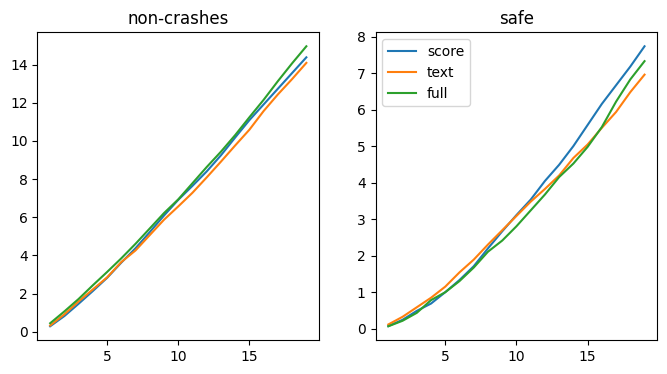

In [11]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

conditions = list(ids.keys())
n_trials = 20

for c in conditions:
    points = []
    errs = []
    for t in range(n_trials):
        data = trial_file.loc[(trial_file['condition'] == c) &  (trial_file['trial'] <= t)]
        data['landed'] = data['outcome'].isin(['Safe', 'Unsafe'])
        data['successful'] = data['outcome'] == 'Safe'
        avg_land = data.groupby('prolific_id')['landed'].sum().mean()
        land_err = data.groupby('prolific_id')['landed'].sum().std()
        avg_success = data.groupby('prolific_id')['successful'].sum().mean()
        success_err = data.groupby('prolific_id')['successful'].sum().std()
        points.append((avg_land, avg_success))
        errs.append((land_err, success_err))
    for a in range(len(axs)):
        x = list(range(n_trials))
        # axs[a].errorbar(x, [pt[a] for pt in points], [er[a] for er in errs], label=c)
        axs[a].plot(x, [pt[a] for pt in points], label=c)
        axs[a].set_title(['non-crashes', 'safe'][a])

plt.legend()
plt.show()

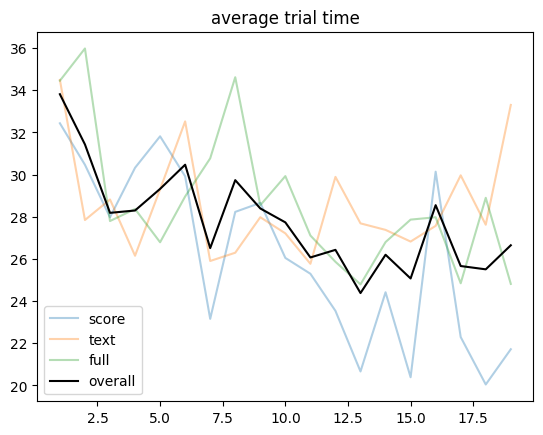

In [12]:
conditions = list(ids.keys())
n_trials = 20

for c in conditions:
    points = []
    errs = []
    for t in range(n_trials):
        data = trial_file.loc[(trial_file['condition'] == c) &  (trial_file['trial'] == t)]
        avg_time = data['trial_time_seconds'].mean()
        time_err = data['trial_time_seconds'].std()
        points.append(avg_time)
        errs.append(time_err)
    x = list(range(n_trials))
    # plt.errorbar(x, points, errs, label=c)
    plt.plot(x, points, alpha=0.35, label=c)

points_all = []
for t in range(n_trials):
        data = trial_file.loc[(trial_file['trial'] == t)]
        avg_time = data['trial_time_seconds'].mean()
        # time_err = data['trial_time_seconds'].std()
        points_all.append(avg_time)
        # errs.append(time_err)
plt.plot(points_all, 'k', label='overall')


plt.title('average trial time')
plt.legend()
plt.show()

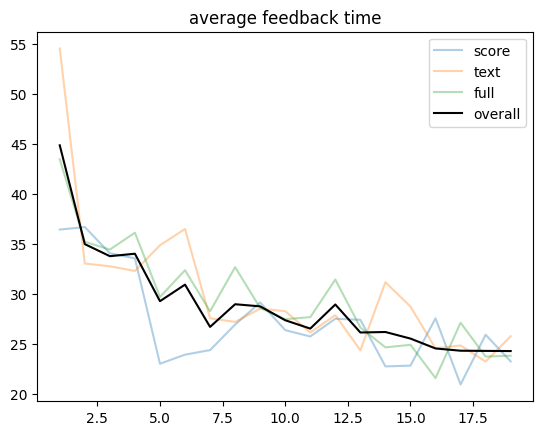

In [13]:
conditions = list(ids.keys())
n_trials = 20

for c in conditions:
    points = []
    errs = []
    for t in range(n_trials):
        data = trial_file.loc[(trial_file['condition'] == c) &  (trial_file['trial'] == t)]
        avg_time = data['feedback_time_seconds'].mean()
        time_err = data['feedback_time_seconds'].std()
        points.append(avg_time)
        errs.append(time_err)
    x = list(range(n_trials))
    # plt.errorbar(x, points, errs, label=c)
    plt.plot(x, points, alpha=0.35, label=c)

points_all = []
for t in range(n_trials):
        data = trial_file.loc[(trial_file['trial'] == t)]
        avg_time = data['feedback_time_seconds'].mean()
        # time_err = data['trial_time_seconds'].std()
        points_all.append(avg_time)
        # errs.append(time_err)
plt.plot(points_all, 'k', label='overall')


plt.title('average feedback time')
plt.legend()
plt.show()

In [15]:
utils.run_anova('avg_trial_time_seconds', part_file)

F_onewayResult(statistic=1.2778041233608721, pvalue=0.2820215153963058)


In [16]:
utils.run_anova('avg_feedback_time_seconds', part_file)

F_onewayResult(statistic=0.8428990580796365, pvalue=0.4327301173977499)


In [17]:
part_file['got_10_landings'] = part_file['n_landings'] >= 10
part_file.groupby('condition')['got_10_landings'].mean()

condition
full     0.956522
score    0.911111
text     0.891304
Name: got_10_landings, dtype: float64

In [18]:
part_file['got_15_landings'] = part_file['n_landings'] >= 15
part_file.groupby('condition')['got_15_landings'].mean()

condition
full     0.695652
score    0.622222
text     0.630435
Name: got_15_landings, dtype: float64

In [53]:
c_table = part_file.groupby('condition')['got_15_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    oddsratio, p_value = stats.fisher_exact(table)
    p_values.append(p_value)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.5117278111862305, 0.6594900741090258, 1.0]
Significant results: [False, False, False]


In [19]:
part_file.groupby('condition')['n_landings'].mean().round(2)

condition
full     16.26
score    15.36
text     15.20
Name: n_landings, dtype: float64

In [55]:
part_file.groupby('condition')['n_safe_landings'].sum()

condition
full     368
score    374
text     354
Name: n_safe_landings, dtype: int64

In [57]:
part_file.groupby('condition')['n_unsafe_landings'].sum()

condition
full     380
score    317
text     345
Name: n_unsafe_landings, dtype: int64

In [58]:
part_file.groupby('condition')['n_crashes'].sum()

condition
full     172
score    209
text     221
Name: n_crashes, dtype: int64

In [20]:
part_file.groupby('condition')['n_landings'].agg(['sum', 'mean', 'std']).round(2)

,sum,mean,std
condition,,,
full,748,16.26,3.08
score,691,15.36,3.98
text,699,15.20,3.87


In [60]:
utils.run_anova('n_landings', part_file)

F_onewayResult(statistic=1.1286574728134895, pvalue=0.3265224972610671)


In [21]:
part_file['any_safe_landings'] = part_file['n_safe_landings'] > 0
part_file['3_safe_landings'] = part_file['n_safe_landings'] >= 3

In [22]:
print(part_file.groupby('condition')['any_safe_landings'].value_counts().unstack())
print(part_file.groupby('condition')['3_safe_landings'].value_counts().unstack())

any_safe_landings  False  True 
condition                      
full                   1     45
score                  8     37
text                   4     42
3_safe_landings  False  True 
condition                    
full                 6     40
score               12     33
text                10     36


In [64]:
c_table = part_file.groupby('condition')['any_safe_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    oddsratio, p_value = stats.fisher_exact(table)
    p_values.append(p_value)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.015187307563778372, 0.3610322262007656, 0.23052995536170712]
Significant results: [True, False, False]


In [65]:
c_table = part_file.groupby('condition')['3_safe_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.chi2_contingency(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.17132894795244324, 0.40926974331915433, 0.7610881571468915]
Significant results: [False, False, False]


In [23]:
# calculate which trial they first achieved three successes in a row
part_file['three_in_a_row_idx'] = 0
n_trials = 20
for i in range(len(part_file)):
    part = part_file.iloc[i]
    data = pd.read_csv(data_dir + part['prolific_id'] + '/survey_responses.csv')
    for trial in range(n_trials-2):
        try:
            if (data['outcome'].iloc[trial] == 'Safe') & (data['outcome'].iloc[trial+1] == 'Safe') & (data['outcome'].iloc[trial+2] == 'Safe'):
                part_file.loc[part_file['prolific_id'] == part['prolific_id'], 'three_in_a_row_idx'] = trial + 1
                break
        except:
            print(f"skipping participant {part['prolific_id']} trial {trial}")

skipping participant 6522a86994a5ce0d7bb9feba trial 17


In [ ]:
part_file[['prolific_id', 'three_in_a_row_idx']].head(10)

In [24]:
part_file['five_in_a_row_idx'] = 0
n_trials = 20
for i in range(len(part_file)):
    part = part_file.iloc[i]
    data = pd.read_csv(data_dir + part['prolific_id'] + '/survey_responses.csv')
    for trial in range(n_trials-4):
        try:
            if (data['outcome'].iloc[trial] == 'Safe') & (data['outcome'].iloc[trial+1] == 'Safe') & (data['outcome'].iloc[trial+2] == 'Safe') & (data['outcome'].iloc[trial+3] == 'Safe') & (data['outcome'].iloc[trial+4] == 'Safe'):
                part_file.loc[part_file['prolific_id'] == part['prolific_id'], 'five_in_a_row_idx'] = trial + 1
                break
        except:
            print(f"skipping participant {part['prolific_id']} trial {trial}")

skipping participant 6522a86994a5ce0d7bb9feba trial 15


In [25]:
part_file['reached_mastery_3'] = part_file['three_in_a_row_idx'] > 0
part_file['reached_mastery_5'] = part_file['five_in_a_row_idx'] > 0

print(part_file.groupby('condition')['reached_mastery_3'].value_counts().unstack())
print(part_file.groupby('condition')['reached_mastery_5'].value_counts().unstack())

reached_mastery_3  False  True 
condition                      
full                  17     29
score                 16     29
text                  21     25
reached_mastery_5  False  True 
condition                      
full                  31     15
score                 27     18
text                  30     16


In [69]:
c_table = part_file.groupby('condition')['reached_mastery_3'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [1.0, 0.5255688467805519, 0.39522767071234843]
Significant results: [False, False, False]


In [70]:
c_table = part_file.groupby('condition')['reached_mastery_5'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.517322927130677, 1.0, 0.6678827480256951]
Significant results: [False, False, False]


In [26]:
print(part_file[part_file['three_in_a_row_idx'] > 0].groupby('condition')['three_in_a_row_idx'].mean())
print(part_file[part_file['five_in_a_row_idx'] > 0].groupby('condition')['five_in_a_row_idx'].mean())

condition
full     9.241379
score    8.517241
text     8.200000
Name: three_in_a_row_idx, dtype: float64
condition
full     8.333333
score    9.111111
text     7.187500
Name: five_in_a_row_idx, dtype: float64


In [72]:
utils.run_kruskal('three_in_a_row_idx', part_file[part_file['three_in_a_row_idx'] > 0])

three_in_a_row_idx    1     2     3     4     5     6     7     8     9   \
condition                                                                  
full                0.03  0.07  0.00  0.14  0.07  0.00  0.10  0.00  0.03   
score               0.00  0.07  0.07  0.03  0.14  0.07  0.10  0.17  0.03   
text                0.12  0.04  0.04  0.12  0.04  0.12  0.08  0.08  0.04   

three_in_a_row_idx    10    11    12    13    14    15    16    17    18  
condition                                                                 
full                0.10  0.17  0.03  0.00  0.07  0.03  0.07  0.03  0.03  
score               0.03  0.00  0.03  0.03  0.07  0.03  0.00  0.03  0.07  
text                0.00  0.00  0.04  0.04  0.04  0.04  0.04  0.04  0.08  
KruskalResult(statistic=0.8359763583772802, pvalue=0.6583700108465329)


In [74]:
utils.run_anova('three_in_a_row_idx', part_file[part_file['three_in_a_row_idx'] > 0])

F_onewayResult(statistic=0.3070766233787385, pvalue=0.7364573743489766)


In [75]:
utils.run_kruskal('five_in_a_row_idx', part_file[part_file['five_in_a_row_idx'] > 0])

five_in_a_row_idx    1     2     3     4     5     6     7     8     9     10  \
condition                                                                       
full               0.00  0.07  0.00  0.27  0.07  0.00  0.13  0.00  0.07  0.07   
score              0.00  0.00  0.06  0.00  0.17  0.00  0.11  0.28  0.00  0.00   
text               0.12  0.06  0.00  0.12  0.06  0.12  0.06  0.06  0.12  0.00   

five_in_a_row_idx    11    12    13    14    15    16  
condition                                              
full               0.07  0.07  0.00  0.07  0.00  0.13  
score              0.06  0.11  0.06  0.06  0.11  0.00  
text               0.00  0.06  0.12  0.00  0.06  0.00  
KruskalResult(statistic=1.7639930805329855, pvalue=0.4139556070448809)


In [77]:
c_table = part_file.groupby('condition')['achieved_mastery_3'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [1.0, 0.5255688467805519, 0.39522767071234843]
Significant results: [False, False, False]


In [78]:
part_file['achieved_mastery_5'] = part_file['five_in_a_row_idx'] > 0
c_table = part_file.groupby('condition')['achieved_mastery_5'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.517322927130677, 1.0, 0.6678827480256951]
Significant results: [False, False, False]


In [27]:
# label each unsafe trial with which mistake they are making
trial_file['mistake'] = ''
for part in part_file['prolific_id']:
    data = pd.read_csv(data_dir + part + '/survey_responses.csv')
    for trial in data['trial']:
        if data.loc[data['trial'] == trial, 'outcome'].values[0] == 'Unsafe':
            # read in robusness file
            robustness = pd.read_csv(data_dir + part + f'/trial_{trial}/robustness.csv')
            reasons = ""
            if robustness.iloc[-1]['landing_speed'] < 0:
                reasons += "landing_speed "
            if robustness.iloc[-1]['landing_angle'] < 0:
                reasons += "landing_angle "
            elif (robustness.iloc[-1]['landing_angle'] > 0) & (robustness.iloc[-1]['landing_speed'] > 0):
                reasons += "something else "
            trial_file.loc[(trial_file['prolific_id'] == part) & (trial_file['trial'] == trial), 'mistake'] = reasons

In [28]:
trial_file['mistake'].value_counts()

mistake
                                1662
landing_speed landing_angle      401
landing_speed                    334
landing_angle                    192
something else                    95
Name: count, dtype: int64

In [81]:
trial_file.groupby(['condition', 'mistake'])['trial'].count().unstack().drop(columns=[''])

mistake,landing_angle,landing_speed,landing_speed landing_angle,something else
condition,,,,
score,46,100,119,24
text,56,85,113,20
full,62,99,115,24


In [82]:
trial_file.groupby(['condition', 'mistake'])['trial'].mean().unstack().drop(columns=['']).round(2)

mistake,landing_angle,landing_speed,landing_speed landing_angle,something else
condition,,,,
score,10.41,11.33,8.98,12.71
text,10.88,11.87,9.55,12.55
full,12.74,10.65,9.17,11.46


In [ ]:
trial_file[trial_file['mistake'] == 'something else ']

From manual inspection, it looks like the "something else" instances are edge cases where the drone lands right on the edge of the landing pad. it is technically in bounds by my measures, but may have been counted as out of bounds by the javascript simulation. Should we leave as is?

skipping participant 5f6666e43be0b923d23c8df8 trial 4
skipping participant 60fcc292d13ae9614d4a77a7 trial 0
skipping participant 5e153f25dc79bdb5290738bd trial 7
skipping participant 652b45ca9fb27ba9325a99cd trial 14
skipping participant 652ab7948cb59f4c50c7972a trial 0
skipping participant 65608f82fbcd84adaf29427b trial 10
skipping participant 65608f82fbcd84adaf29427b trial 11
skipping participant 5f16c677bc5f86028f33fc62 trial 6
skipping participant 5f5aa60bef062519ff711fe6 trial 0
skipping participant 6095fc75ab1d101e060d808b trial 11
skipping participant 5bd49bcc25db7b0001794063 trial 0
skipping participant 5c1a0a74cdd50e00014c7f75 trial 16
skipping participant 5fab76ecea3019678ca9ef4d trial 11
skipping participant 65c1779a3f438c1cdcd9641a trial 0
skipping participant 65c1779a3f438c1cdcd9641a trial 2
skipping participant 5e164e81502213c397f0cf39 trial 0
skipping participant 628d78a2ccf4a41f24c2d2d8 trial 2
skipping participant 628d78a2ccf4a41f24c2d2d8 trial 5
skipping participant 6

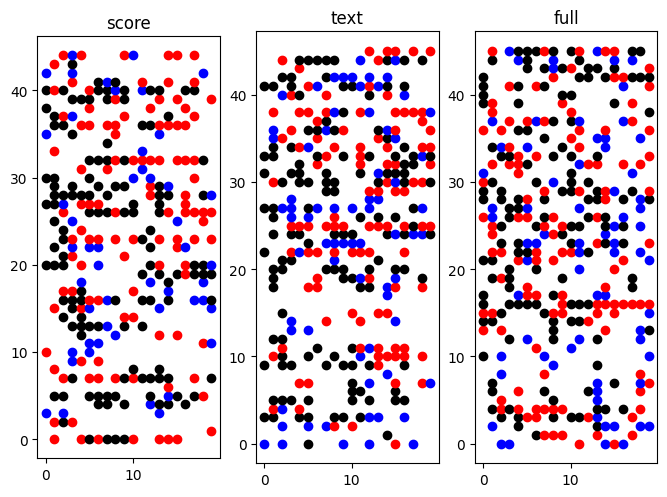

In [29]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

for a in range(len(axs)):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        for trial in range(n_trials):
            try:
                reason = trial_file[(trial_file['prolific_id'] == part) & (trial_file['trial'] == trial+1)]['mistake'].values[0]
                if 'speed' in reason and 'angle' not in reason:
                    axs[a].plot(trial, i, 'ro')
                elif 'angle' in reason and 'speed' not in reason:
                    axs[a].plot(trial, i, 'bo')
                elif 'angle' in reason and 'speed' in reason:
                    axs[a].plot(trial, i, 'ko')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

### Are there different numbers of successful trials between conditions?

In [84]:
utils.run_kruskal('n_safe_landings', part_file)

n_safe_landings    0     1     2     3     4     5     6     7     8     9   \
condition                                                                     
full             0.02  0.04  0.07  0.09  0.02  0.09  0.07  0.09  0.07  0.02   
score            0.18  0.04  0.04  0.02  0.04  0.02  0.02  0.02  0.04  0.09   
text             0.09  0.07  0.07  0.04  0.04  0.09  0.11  0.04  0.04  0.04   

n_safe_landings    10    11    12    13    14    15    16    17    18    19  
condition                                                                    
full             0.09  0.13  0.04  0.09  0.02  0.00  0.04  0.02  0.00  0.00  
score            0.04  0.04  0.04  0.09  0.07  0.07  0.07  0.04  0.00  0.00  
text             0.04  0.04  0.07  0.07  0.02  0.02  0.04  0.00  0.04  0.02  
KruskalResult(statistic=0.40403237913950363, pvalue=0.8170816996339875)


In [85]:
utils.run_anova('n_safe_landings', part_file)

F_onewayResult(statistic=0.1544664794301834, pvalue=0.8570245676784923)


In [86]:
utils.run_kruskal('n_unsafe_landings', part_file)

n_unsafe_landings    1     2     3     4     5     6     7     8     9     10  \
condition                                                                       
full               0.00  0.02  0.02  0.11  0.00  0.13  0.09  0.17  0.13  0.09   
score              0.02  0.04  0.13  0.13  0.13  0.02  0.09  0.09  0.04  0.02   
text               0.02  0.11  0.04  0.11  0.07  0.04  0.07  0.13  0.09  0.04   

n_unsafe_landings    11    12    13    14    15    16  
condition                                              
full               0.13  0.04  0.02  0.02  0.00  0.02  
score              0.09  0.07  0.09  0.02  0.00  0.00  
text               0.11  0.11  0.04  0.00  0.02  0.00  
KruskalResult(statistic=2.6519178902378977, pvalue=0.26554819081262687)


In [87]:
utils.run_anova('n_unsafe_landings', part_file)

F_onewayResult(statistic=1.4117046886173055, pvalue=0.24732849441554897)


In [88]:
utils.run_kruskal('n_crashes', part_file)

n_crashes    0     1     2     3     4     5     6     7     8     10    11  \
condition                                                                     
full       0.13  0.20  0.09  0.15  0.07  0.07  0.09  0.11  0.04  0.02  0.04   
score      0.07  0.18  0.11  0.16  0.07  0.04  0.07  0.16  0.07  0.00  0.02   
text       0.13  0.07  0.13  0.11  0.07  0.13  0.09  0.11  0.04  0.02  0.04   

n_crashes    12    13    16    17  
condition                          
full       0.00  0.00  0.00  0.00  
score      0.00  0.02  0.02  0.02  
text       0.02  0.02  0.00  0.02  
KruskalResult(statistic=1.7063744591666914, pvalue=0.4260548310615224)


In [89]:
utils.run_anova('n_crashes', part_file)

F_onewayResult(statistic=1.1324355748023924, pvalue=0.32531158360812246)


### Differences in outcomes in first/last half of the experiment?

In [30]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=6.312020416306604, pvalue=1.114738147202173e-09, df=272.0)


In [31]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=0.591597647191257, pvalue=0.5546114075148025, df=272.0)


In [32]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=-5.27966707295211, pvalue=2.6506100558654545e-07, df=272.0)


In [33]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=2.8864476532066705, pvalue=0.004900852794567911, df=88.0)


In [34]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=1.4426416215207372, pvalue=0.1526714347611448, df=88.0)


In [35]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=-3.1127963500528684, pvalue=0.002499969735273218, df=88.0)


In [36]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=3.458115066981767, pvalue=0.0008328514484824556, df=90.0)


In [37]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-0.9827881281483631, pvalue=0.3283463584931763, df=90.0)


In [38]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-2.0448835689992713, pvalue=0.04378696381053929, df=90.0)


In [39]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=4.770064642241343, pvalue=7.066174844716378e-06, df=90.0)


In [40]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=0.6202613052303488, pvalue=0.5366531897171569, df=90.0)


In [41]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=-4.186254810721787, pvalue=6.591575565497621e-05, df=90.0)


In [42]:
trialsh1 = trial_file[trial_file['trial'] <= 10]
outcomesh1 = pd.merge(trialsh1.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

trialsh2 = trial_file[trial_file['trial'] > 10]
outcomesh2 = pd.merge(trialsh2.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

outcomesh2['safe_diffs'] = outcomesh2['Safe'] - outcomesh1['Safe']
outcomesh2['unsafe_diffs'] = outcomesh2['Unsafe'] - outcomesh1['Unsafe']
outcomesh2['crash_diffs'] = outcomesh2['Crash'] - outcomesh1['Crash']

In [43]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'])

F_onewayResult(statistic=1.7871280833183572, pvalue=0.1714079163360719)

In [44]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'])

KruskalResult(statistic=3.1259965738926008, pvalue=0.2095069665509561)

In [45]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['unsafe_diffs'])

F_onewayResult(statistic=3.0460210745420095, pvalue=0.050853313953928184)

In [46]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['unsafe_diffs'])

KruskalResult(statistic=6.8345466298627064, pvalue=0.032801753162922186)

In [47]:
sp.posthoc_dunn(outcomesh2, val_col='unsafe_diffs', group_col='condition', p_adjust='bonferroni')

,full,score,text
full,1.000000,0.966245,0.324274
score,0.966245,1.000000,0.028946
text,0.324274,0.028946,1.000000


In [48]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['crash_diffs'])

F_onewayResult(statistic=0.689657622630395, pvalue=0.5035197543724557)

In [49]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['crash_diffs'])

KruskalResult(statistic=0.9236707194456654, pvalue=0.630126075533876)

In [50]:
outcomesh2.groupby('condition')[['crash_diffs','unsafe_diffs','safe_diffs']].mean().round(2)

,crash_diffs,unsafe_diffs,safe_diffs
condition,,,
full,-1.85,-0.24,2.17
score,-1.33,-0.64,2.02
text,-1.59,0.43,1.28


### What about first and last quarter?

In [51]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=8.453247764296567, pvalue=1.745785278078666e-15, df=272.0)


In [52]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=1.3132187170658103, pvalue=0.19021599770371042, df=272.0)


In [53]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=-8.680535729493688, pvalue=3.692134563521983e-16, df=272.0)


In [54]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=3.9789674085994906, pvalue=0.0001418586807287439, df=88.0)


In [55]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=1.4122159278420172, pvalue=0.16141300281864054, df=88.0)


In [56]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=-4.890096469218257, pvalue=4.506240952251832e-06, df=88.0)


In [57]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=5.0453630440619355, pvalue=2.3377389780557668e-06, df=90.0)


In [58]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-0.5621729377379314, pvalue=0.5753956919133283, df=90.0)


In [59]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-3.87567251812528, pvalue=0.0002016706536141498, df=90.0)


In [60]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=5.952522654434597, pvalue=5.0037872772396944e-08, df=90.0)


In [61]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=1.5505889600819815, pvalue=0.12450971290143559, df=90.0)


In [62]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=-6.465025016945542, pvalue=5.111929601550887e-09, df=90.0)


In [63]:
trialsq1 = trial_file[trial_file['trial'] <= 5]
outcomesq1 = pd.merge(trialsq1.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

trialsq4 = trial_file[trial_file['trial'] > 15]
outcomesq4 = pd.merge(trialsq4.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

outcomesq4['safe_diffs'] = outcomesq4['Safe'] - outcomesq1['Safe']
outcomesq4['unsafe_diffs'] = outcomesq4['Unsafe'] - outcomesq1['Unsafe']
outcomesq4['crash_diffs'] = outcomesq4['Crash'] - outcomesq1['Crash']

In [64]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['safe_diffs'])

F_onewayResult(statistic=1.3209836637414718, pvalue=0.2703251007177133)

In [65]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['safe_diffs'])

KruskalResult(statistic=2.37692340520991, pvalue=0.30468960697771946)

In [66]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['unsafe_diffs'])

F_onewayResult(statistic=1.6209233652471715, pvalue=0.20156838636361699)

In [67]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['unsafe_diffs'])

KruskalResult(statistic=3.561145349410922, pvalue=0.16854160011497393)

In [68]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['crash_diffs'])

F_onewayResult(statistic=0.17151629199105814, pvalue=0.8425711832397592)

In [69]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['crash_diffs'])

KruskalResult(statistic=0.3283557640305569, pvalue=0.8485910593660593)

In [70]:
outcomesq4.groupby('condition')[['crash_diffs','unsafe_diffs','safe_diffs']].mean()

,crash_diffs,unsafe_diffs,safe_diffs
condition,,,
full,-1.391304,-0.369565,1.804348
score,-1.200000,-0.377778,1.666667
text,-1.304348,0.152174,1.260870


### Look at robustness and efficiency

In [ ]:
# what are max and min values for the robustness and efficiency measures?
robustness_cols = ['left_boundary',	'right_boundary', 'top_boundary', 'bottom_boundary', 'landing_left', 'landing_right', 'landing_speed','landing_angle']
robustness_files = glob.glob(f'{data_dir}*/*/robustness.csv')
robustness_vals = {v : {'max':-99999, 'min':99999} for v in robustness_cols}

In [ ]:
for f in robustness_files:
    df = pd.read_csv(f)
    for col in robustness_cols:
        if df[col].min() < robustness_vals[col]['min']:
            robustness_vals[col]['min'] = min(df[col])
        if df[col].max() > robustness_vals[col]['max']:
            robustness_vals[col]['max'] = max(df[col])

robustness_vals

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,6))
n_trials = 20
var = 'landing_speed'

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=robustness_vals[var]['max'], vmax=robustness_vals[var]['min'])

conditions = list(ids.keys())

for a in range(len(axs)-1):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome in ['Safe', 'Unsafe']:
                    trial_data = pd.read_csv(f"{data_dir}{part}/trial_{trial+1}/robustness.csv")
                    val = trial_data.iloc[-1][var]
                    val_normed = (val - robustness_vals[var]['min'])/(robustness_vals[var]['max'] - robustness_vals[var]['min'])
                    c = cmap(val_normed)
                    axs[a].plot(trial, i, marker='o', color=c)
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label='robustness',cax=axs[-1])
plt.show()

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,6))
n_trials = 20
var = 'landing_angle'

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=robustness_vals[var]['min'], vmax=robustness_vals[var]['max'])

conditions = list(ids.keys())

for a in range(len(axs)-1):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome in ['Safe', 'Unsafe']:
                    trial_data = pd.read_csv(f"{data_dir}{part}/trial_{trial+1}/robustness.csv")
                    val = trial_data.iloc[-1][var]
                    val_normed = (val - robustness_vals[var]['min'])/(robustness_vals[var]['max'] - robustness_vals[var]['min'])
                    c = cmap(val_normed)
                    axs[a].plot(trial, i, marker='o', color=c)
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label='robustness',cax=axs[-1])
plt.show()

# Pulling out qualitative stuff

Grab all the images. This only needs to be done once.

In [ ]:
utils.copy_images(part_file['prolific_id'])